In [ ]:
import pandas as pd
import numpy as np

In [ ]:
hs = pd.read_csv ("../Data/SpeedD.csv")

In [ ]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  258 non-null    int64 
 1   age     258 non-null    int64 
 2   income  258 non-null    int64 
 3   goal    258 non-null    int64 
 4   career  258 non-null    object
 5   dec     258 non-null    int64 
 6   attr    258 non-null    int64 
 7   sinc    258 non-null    int64 
 8   intel   258 non-null    int64 
 9   fun     258 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 20.3+ KB


In [ ]:
hs.head()

,gender,age,income,goal,career,dec,attr,sinc,intel,fun
0,0,21,69487,2,lawyer,1,6,9,7,7
1,0,21,69487,2,lawyer,1,7,8,7,8
2,0,21,69487,2,lawyer,1,5,8,9,8
3,0,21,69487,2,lawyer,1,7,6,8,7
4,0,21,69487,2,lawyer,1,5,6,7,7


In [ ]:
hs2 = hs.drop(['career'], axis = 1)

In [ ]:
hs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   gender  258 non-null    int64
 1   age     258 non-null    int64
 2   income  258 non-null    int64
 3   goal    258 non-null    int64
 4   dec     258 non-null    int64
 5   attr    258 non-null    int64
 6   sinc    258 non-null    int64
 7   intel   258 non-null    int64
 8   fun     258 non-null    int64
dtypes: int64(9)
memory usage: 18.3 KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
y = hs2.dec.values #target
x = hs2.drop(['dec'], axis = 1) #input

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

In [ ]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train,y_train)

acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 70.51%


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 70.51%


In [ ]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 19, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 75.64%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(x_train, y_train)

acc = knn.score(x_test,y_test)*100
accuracies['KNN'] = acc

print('Accuracy of K-NN classifier on test set: {:.2f}'.format(acc))

Accuracy of K-NN classifier on test set: 69.23


C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


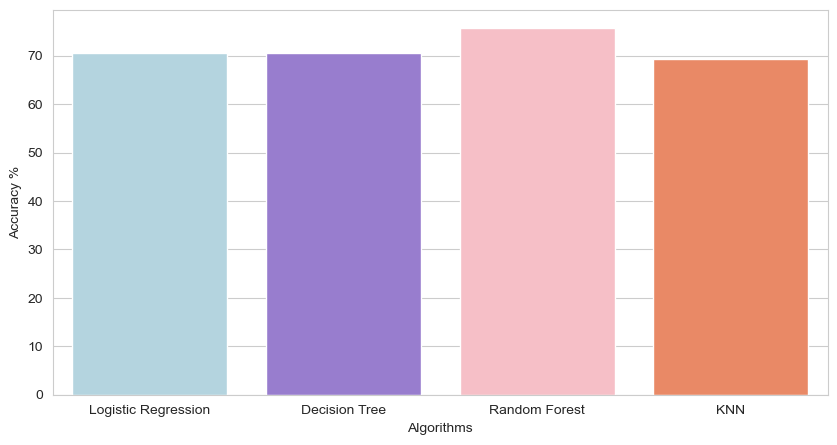

In [ ]:
colors = ["lightblue", "mediumpurple", "lightpink", "coral"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors) #keys, the name of algorithm #y axis pass vaalue
plt.show()

In [ ]:
# Predicted values
y_head_lr = lr.predict(x_test) #test input
y_head_dtc = dtc.predict(x_test)
y_head_rf = rf.predict(x_test)
y_head_knn = knn.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)
cm_knn = confusion_matrix(y_test,y_head_knn)

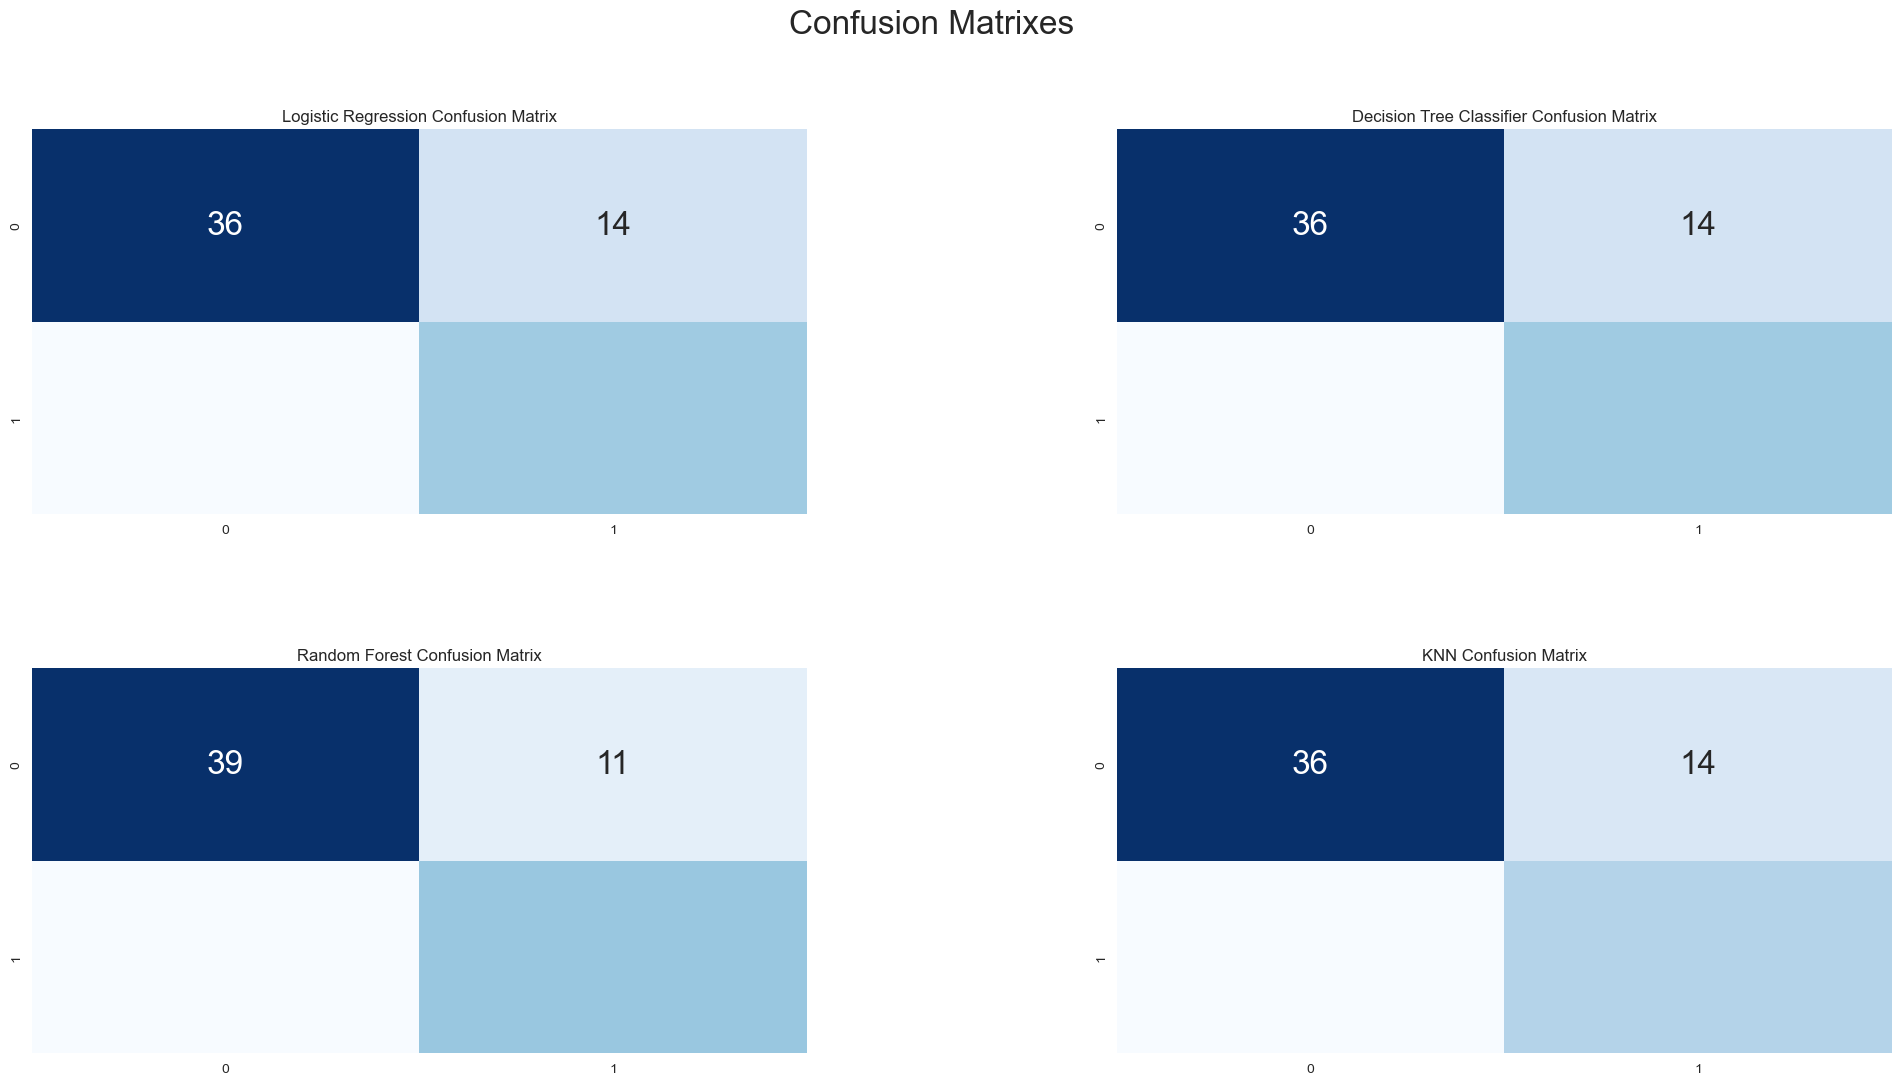

In [ ]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,3)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,4)
plt.title("KNN Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

Decision Tree: ROC AUC=0.696


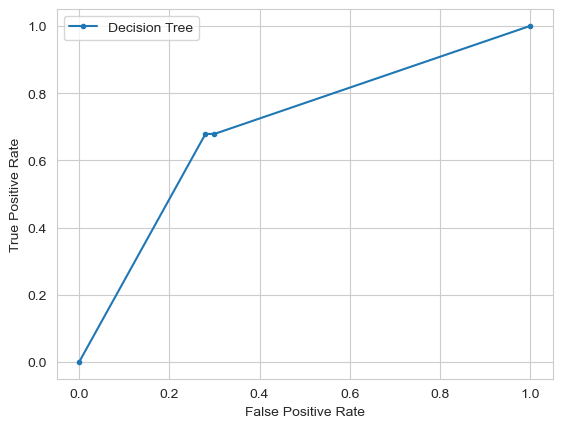

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# predict probabilities
dtc_probs = dtc.predict_proba(x_test)
# keep probabilities for the positive outcome only
dtc_probs = dtc_probs[:, 1]
# calculate scores
dtc_auc = roc_auc_score(y_test, dtc_probs)
# summarize scores
print('Decision Tree: ROC AUC=%.3f' % (dtc_auc))


# calculate roc curves #Receiver Operating Characteristic
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(dtc_fpr, dtc_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()